In [1]:
import os

# Define the root directory of your dataset folder
dataset_root = r"C:\Users\Astel Pauly\Desktop\multipple disease prediciton\mini\chest_xray"



In [2]:
#PIL-python library for perform image operations
#tensorflow-for creating neural networks
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

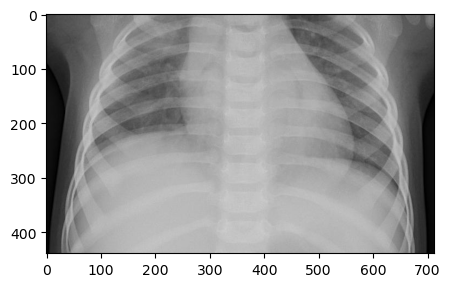

In [3]:
#opening an image in train/pneumonia/1st image
import cv2
plt.figure(figsize=(5,5))
img = cv2.imread(r"C:\Users\Astel Pauly\Desktop\multipple disease prediciton\mini\chest_xray\train\PNEUMONIA\person1_bacteria_1.jpeg")
plt.imshow(img)
plt.show()

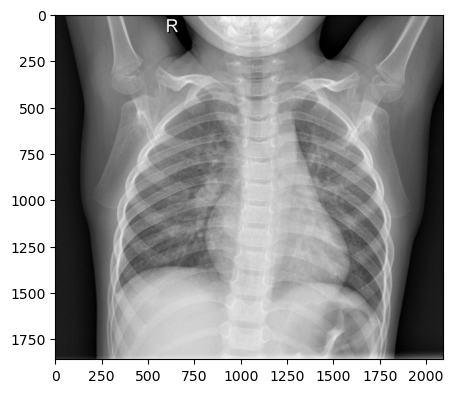

In [4]:
plt.figure(figsize=(5,5))
img = cv2.imread(r"C:\Users\Astel Pauly\Desktop\multipple disease prediciton\mini\chest_xray\train\NORMAL\IM-0115-0001.jpeg")
plt.imshow(img)
plt.show()

In [5]:
#ImageDataGenerator divides the whole dataset into train,test,val
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#informing the ImageDataGenerator to load the training_dir for training the data
training_dir =(r"C:\Users\Astel Pauly\Desktop\multipple disease prediciton\mini\chest_xray\train")
training_generator=ImageDataGenerator(rescale=1/255)
data_train = training_generator.flow_from_directory(training_dir,target_size=(120,120),batch_size=8,class_mode="binary")

Found 5216 images belonging to 2 classes.


In [7]:
testing_dir =(r"C:\Users\Astel Pauly\Desktop\multipple disease prediciton\mini\chest_xray\test")
testing_generator=ImageDataGenerator(rescale=1/255)
data_test = testing_generator.flow_from_directory(testing_dir,target_size=(120,120),batch_size=8,class_mode="binary")

Found 624 images belonging to 2 classes.


In [8]:
validation_dir =(r"C:\Users\Astel Pauly\Desktop\multipple disease prediciton\mini\chest_xray\val")
validation_generator=ImageDataGenerator(rescale=1/255)
data_val = validation_generator.flow_from_directory(validation_dir,target_size=(120,120),batch_size=8,class_mode="binary")

Found 16 images belonging to 2 classes.


In [9]:
labels = {value: key for key, value in data_train.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : NORMAL
1 : PNEUMONIA


In [10]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(120,120,3)),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(256,activation="relu"),
                            tf.keras.layers.Dense(1,activation="sigmoid")
                            ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [13]:
model.compile(optimizer=tf.optimizers.Adam(),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [14]:
history = model.fit_generator(data_train,epochs=15,validation_data=data_val)

Epoch 1/15


C:\Users\Astel Pauly\AppData\Local\Temp\ipykernel_384\2322358701.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_train,epochs=15,validation_data=data_val)


652/652 [==============================] - 229s 349ms/step - loss: 0.4980 - accuracy: 0.7778 - val_loss: 2.3030 - val_accuracy: 0.6875
Epoch 2/15
652/652 [==============================] - 218s 334ms/step - loss: 0.1865 - accuracy: 0.9302 - val_loss: 0.1828 - val_accuracy: 1.0000
Epoch 3/15
652/652 [==============================] - 207s 318ms/step - loss: 0.1286 - accuracy: 0.9505 - val_loss: 0.9754 - val_accuracy: 0.6875
Epoch 4/15
652/652 [==============================] - 213s 326ms/step - loss: 0.0976 - accuracy: 0.9607 - val_loss: 1.5071 - val_accuracy: 0.6875
Epoch 5/15
652/652 [==============================] - 226s 347ms/step - loss: 0.0701 - accuracy: 0.9739 - val_loss: 2.1776 - val_accuracy: 0.6875
Epoch 6/15
652/652 [==============================] - 221s 339ms/step - loss: 0.0920 - accuracy: 0.9682 - val_loss: 0.3242 - val_accuracy: 0.8750
Epoch 7/15
652/652 [==============================] - 218s 334ms/step - loss: 0.0574 - accuracy: 0.9781 - val_loss: 1.7295 - val_accura

In [15]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

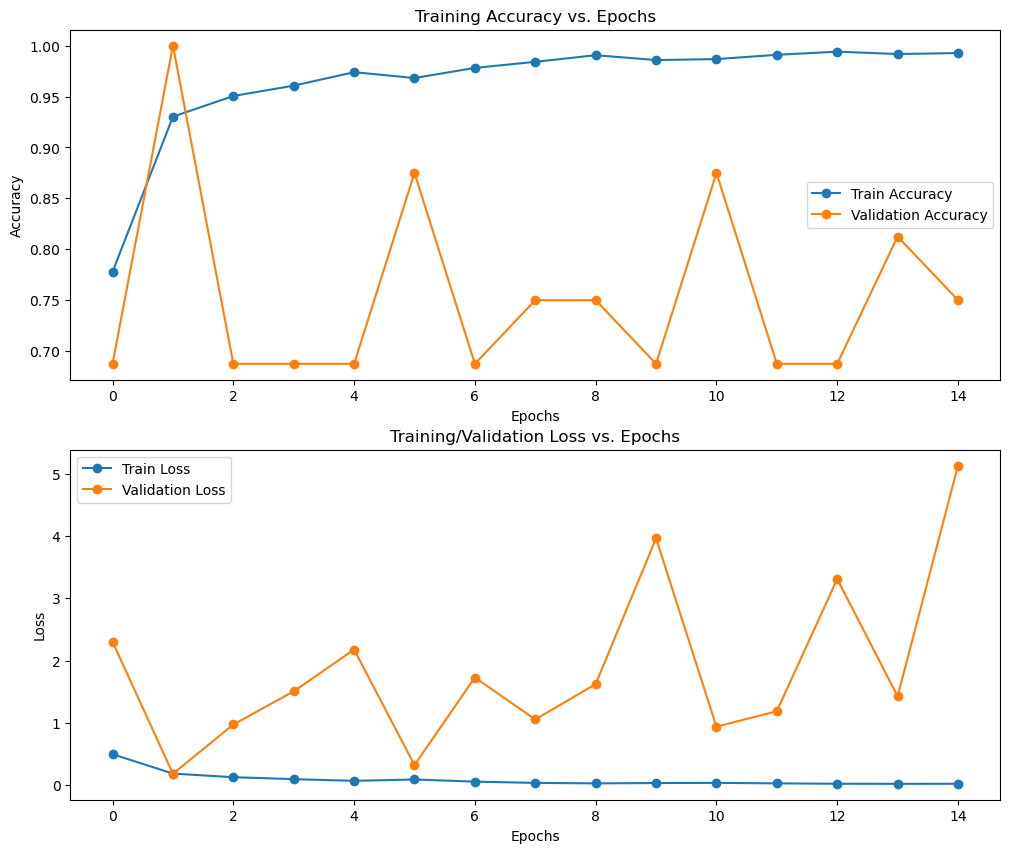

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

In [17]:
#model performs on test data
#model performs on test data
#model.evaluate(data_test)
test_loss, test_accuracy = model.evaluate(data_test, batch_size=10)
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

78/78 [==============================] - 6s 77ms/step - loss: 3.3141 - accuracy: 0.7756
Test Loss:     3.3141114711761475
Test Accuracy: 0.7756410241127014


In [18]:
predictions = model.predict(data_test)

78/78 [==============================] - 6s 72ms/step


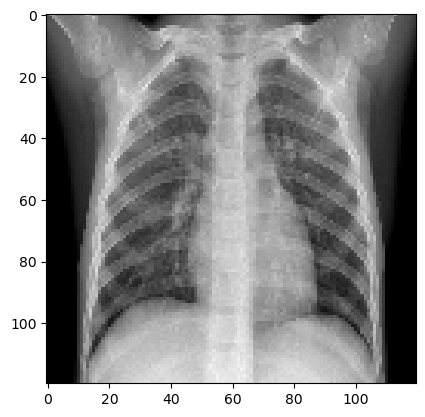

The probability of pneumonia is: [0.99827516]


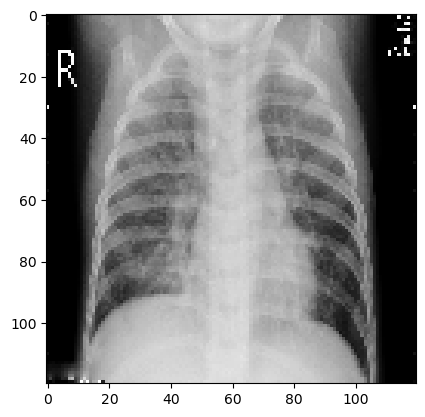

The probability of pneumonia is: [0.00016722]


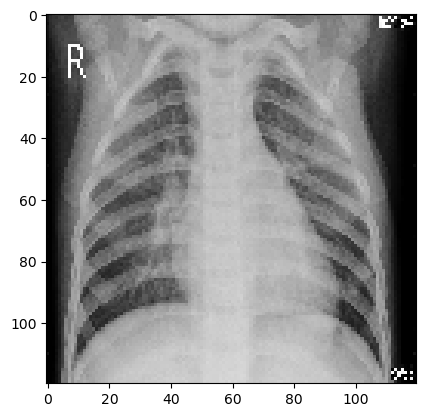

The probability of pneumonia is: [1.]


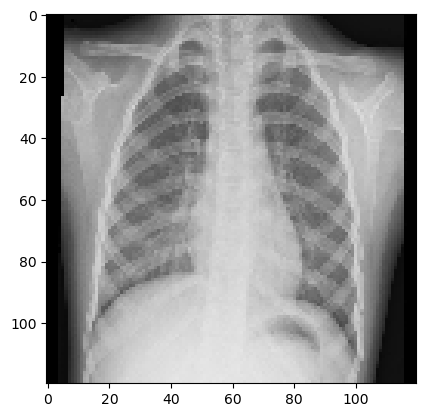

The probability of pneumonia is: [1.]


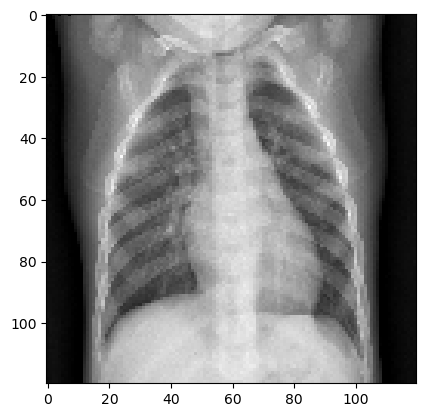

The probability of pneumonia is: [0.9999463]


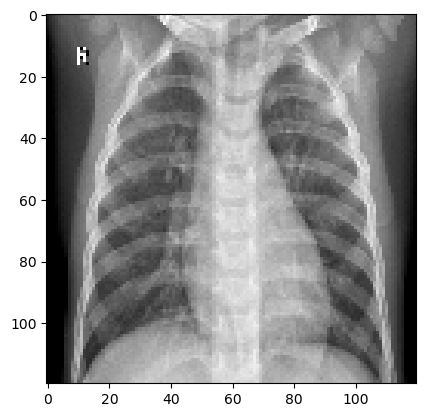

The probability of pneumonia is: [1.]


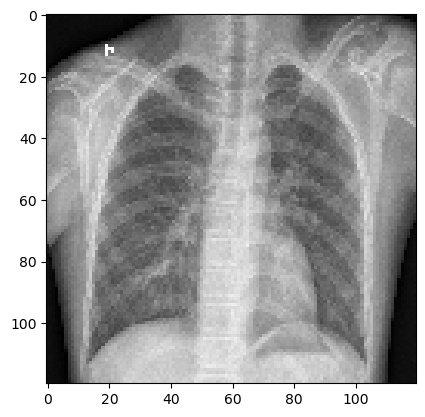

The probability of pneumonia is: [1.]


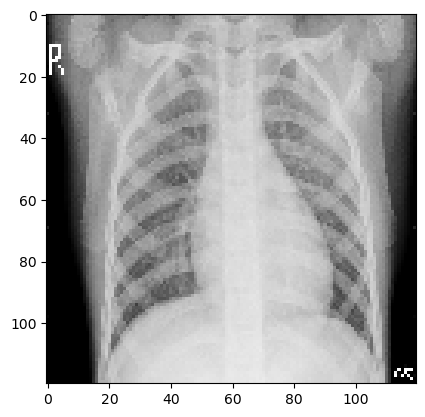

The probability of pneumonia is: [1.]


In [19]:
#range(0,8)=8(since-batch_size is 8)
x=data_test.next()
for i in range(0,1):
    image=x[i]
    for j in range(0,8):
        plt.imshow(image[j])
        plt.show()
        print("The probability of pneumonia is:",predictions[j])

In [25]:
# Save the model to a file
model.save('pneumonia_predictionn.h5')
